# Decision Tree :

***Problem Statement :***
- A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
- Approach : A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


***About the data :*** 
Let’s consider a Company dataset with around 10 variables and 400 records. 

The attributes are as follows: 
-  Sales : Unit sales (in thousands) at each location.
-  Competitor Price : Price charged by competitor at each location.
-  Income : Community income level (in thousands of dollars).
-  Advertising : Local advertising budget for company at each location (in thousands of dollars).
-  Population : Population size in region (in thousands).
-  Price : Price company charges for car seats at each site.
-  Shelf Location at stores : A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site.
-  Age : Average age of the local population.
-  Education : Education level at each location.
-  Urban : A factor with levels No and Yes to indicate whether the store is in an urban or rural location.
-  US : A factor with levels No and Yes to indicate whether the store is in the US or not.

 


In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as pe
import matplotlib.image as mpimg
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, r2_score

# Ignore anoying warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading dataset
df = pd.read_csv("Company_Data.csv")

# Showing first 5 rows from dataset
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
# Total rows & columns present in dataset
df.shape

(400, 11)

In [4]:
# Infromation about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [3]:
# Checking additional stats from dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,400.0,7.496325,2.824115,0.0,5.39,7.49,9.32,16.27
CompPrice,400.0,124.975000,15.334512,77.0,115.00,125.00,135.00,175.00
Income,400.0,68.657500,27.986037,21.0,42.75,69.00,91.00,120.00
Advertising,400.0,6.635000,6.650364,0.0,0.00,5.00,12.00,29.00
Population,400.0,264.840000,147.376436,10.0,139.00,272.00,398.50,509.00
Price,400.0,115.795000,23.676664,24.0,100.00,117.00,131.00,191.00
Age,400.0,53.322500,16.200297,25.0,39.75,54.50,66.00,80.00
Education,400.0,13.900000,2.620528,10.0,12.00,14.00,16.00,18.00


In [5]:
# Looking for null values
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

<AxesSubplot: >

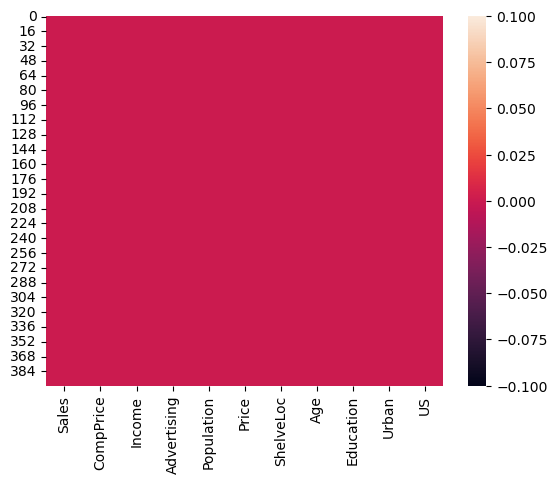

In [5]:
# Checking null values
sns.heatmap(df.isna())

In [6]:
# Understanding the correlation between each columns

corr=df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(4)

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.0000,0.0641,0.1520,0.2695,0.0505,-0.4450,-0.2318,-0.0520
CompPrice,0.0641,1.0000,-0.0807,-0.0242,-0.0947,0.5848,-0.1002,0.0252
Income,0.1520,-0.0807,1.0000,0.0590,-0.0079,-0.0567,-0.0047,-0.0569
Advertising,0.2695,-0.0242,0.0590,1.0000,0.2657,0.0445,-0.0046,-0.0336
Population,0.0505,-0.0947,-0.0079,0.2657,1.0000,-0.0121,-0.0427,-0.1064
Price,-0.4450,0.5848,-0.0567,0.0445,-0.0121,1.0000,-0.1022,0.0117
Age,-0.2318,-0.1002,-0.0047,-0.0046,-0.0427,-0.1022,1.0000,0.0065
Education,-0.0520,0.0252,-0.0569,-0.0336,-0.1064,0.0117,0.0065,1.0000


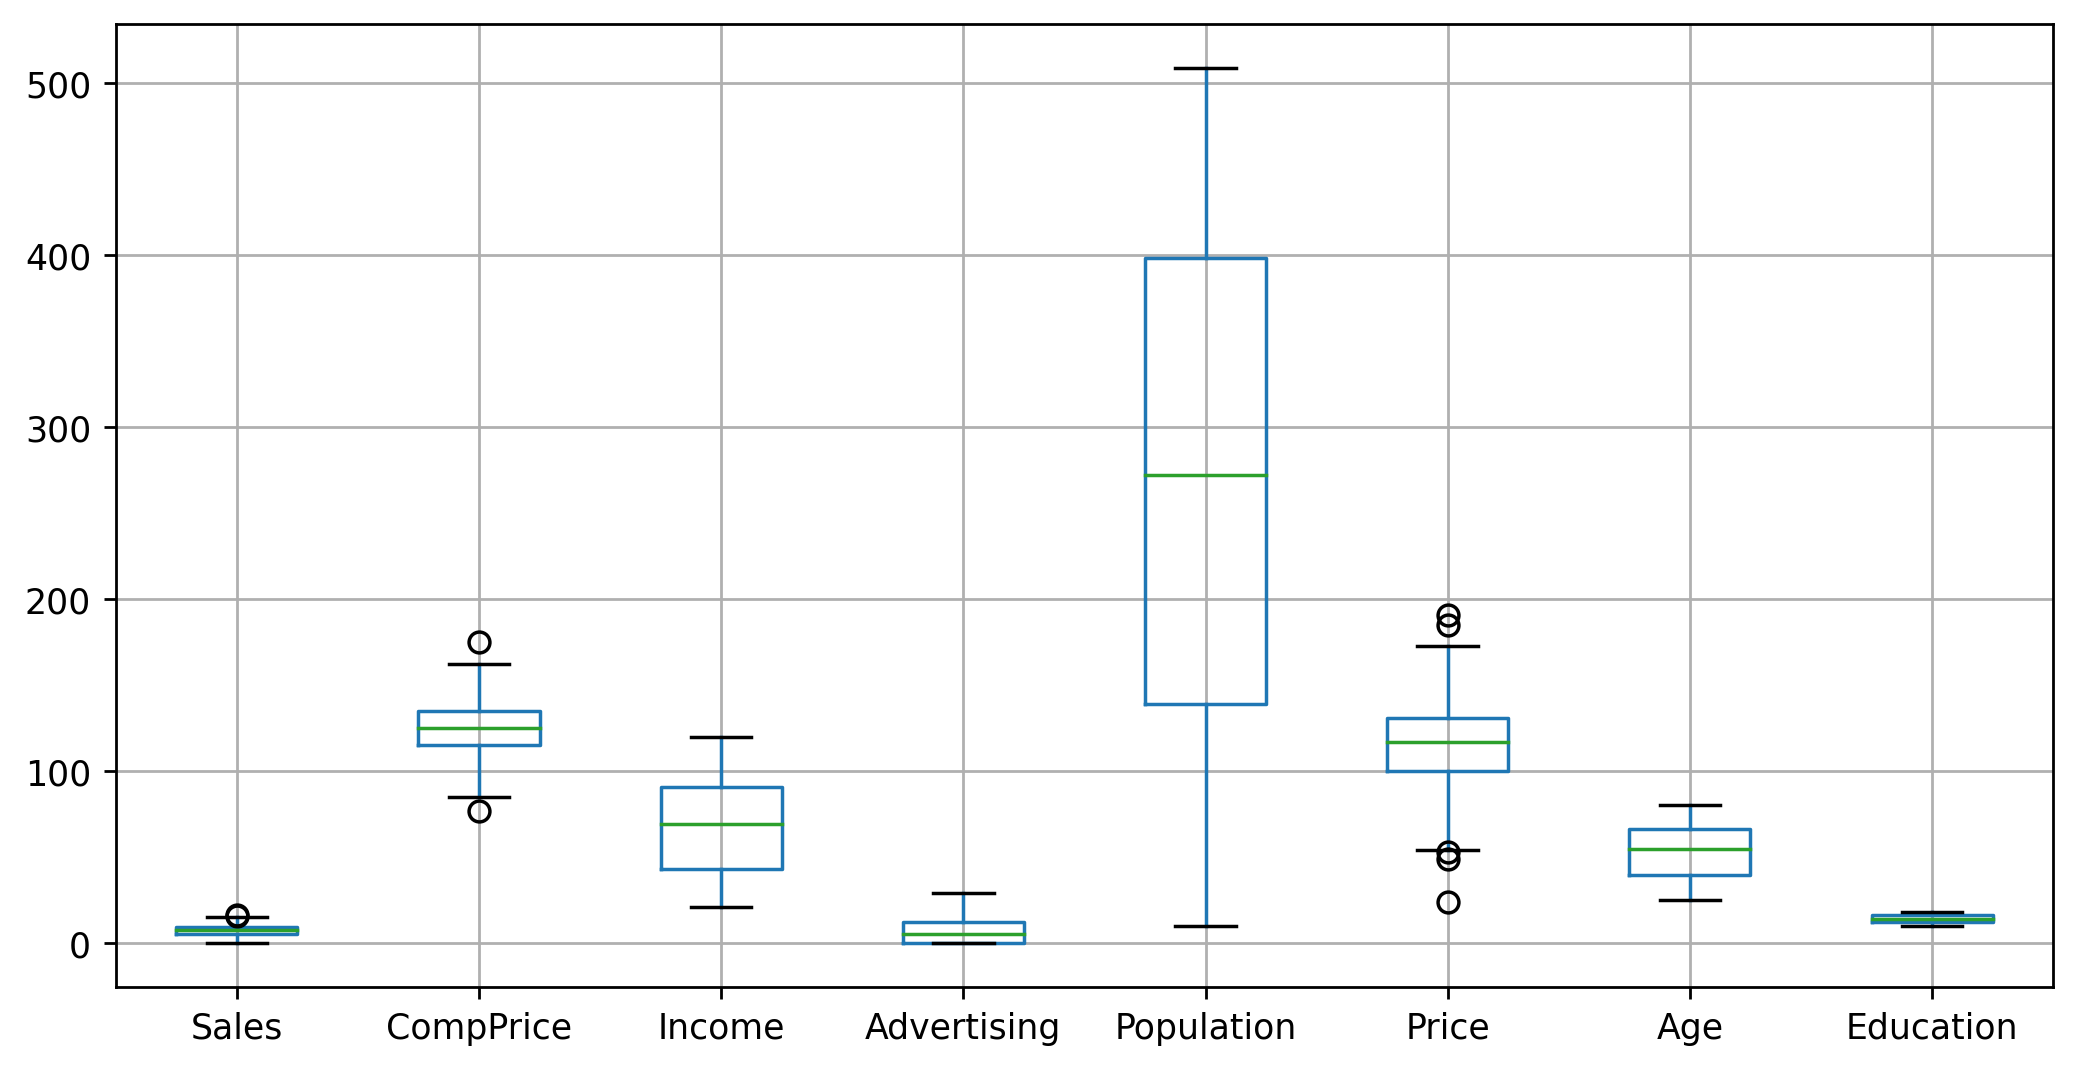

In [7]:
# Checking outliers from dataset

plt.rcParams['figure.figsize'] = [10,5]
plt.rcParams['figure.dpi'] = 250

df.boxplot()
plt.show()

In [9]:
# Converting categorical columns into numerical columns 
df = pd.get_dummies(df, columns=['ShelveLoc','Urban','US'])

<AxesSubplot: >

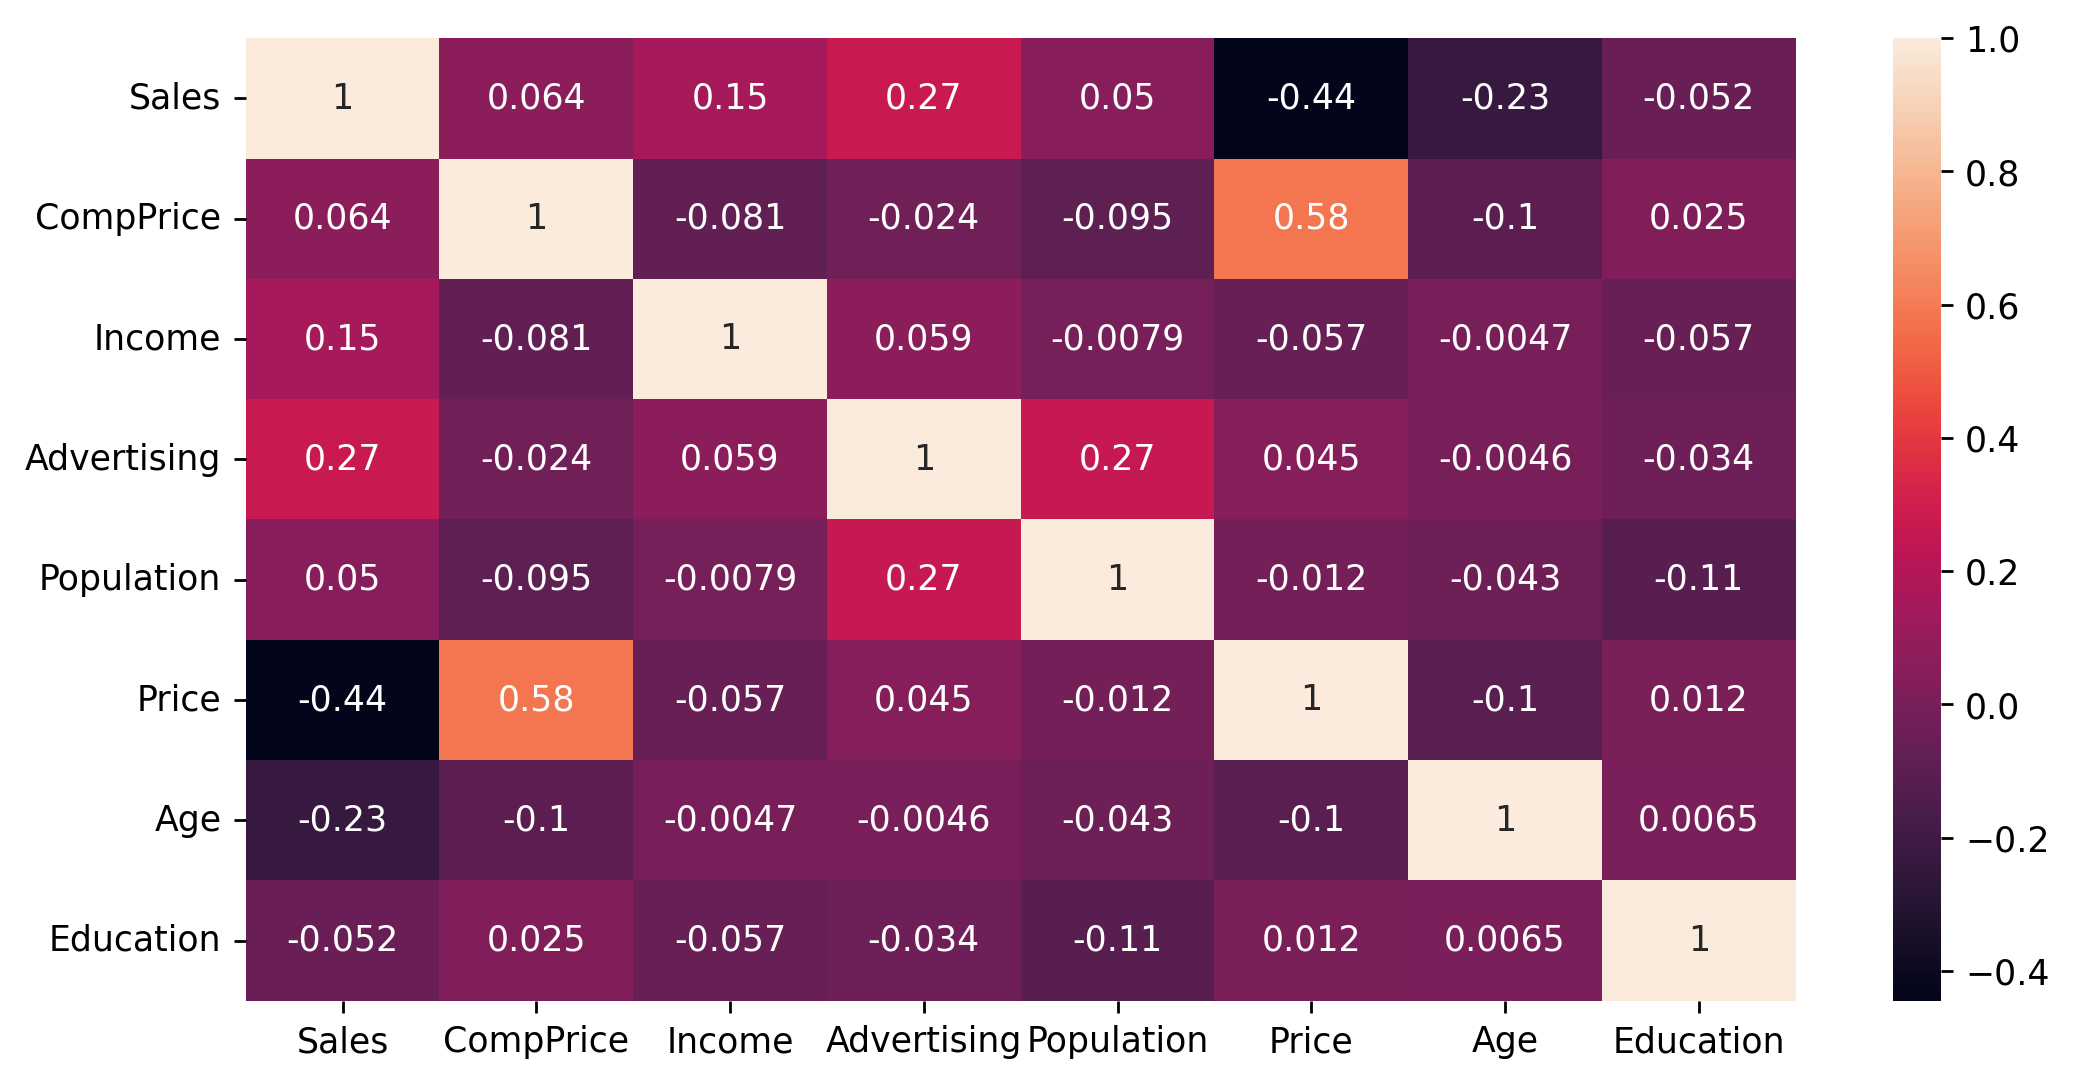

In [8]:
# Understanding the correlation between each columns

corr=df.corr()
sns.heatmap(corr, annot=True)

***Since the target variable is continious, we create a class of the value based on the mean <= 7.49 == "Small" and > 7.49 == "large"***

In [10]:
df["sales"]="small"
df.loc[df["Sales"]>7.49,"sales"]="large"
df.drop(["Sales"],axis=1,inplace=True)

In [11]:
df['sales'].value_counts()

small    201
large    199
Name: sales, dtype: int64

In [12]:
# Creating independent & dependent variables

x = df.iloc[:,0:14] #Independent variable
y = df.iloc[:,14] #Dependent variable

In [13]:
# Splitting data into training & testing sets

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1,stratify=y)

In [14]:
dt = DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)

In [15]:
print('Train Accuracy :', dt.score(xtrain,ytrain))
print('Test Accuracy :', dt.score(xtest,ytest))
print(classification_report(ytest,ypred))

Train Accuracy : 1.0
Test Accuracy : 0.775
              precision    recall  f1-score   support

       large       0.74      0.85      0.79        40
       small       0.82      0.70      0.76        40

    accuracy                           0.78        80
   macro avg       0.78      0.77      0.77        80
weighted avg       0.78      0.78      0.77        80



***Hyperparameter Tunning :***

In [16]:
params = {
    'criterion' : ["gini", "entropy"],
    'splitter' : ['best','random'],
    'max_depth' : [2,3,4,5,6,7,8,9]
}

In [17]:
grid = GridSearchCV(DecisionTreeClassifier(), param_grid=params)

In [18]:
grid.fit(xtrain,ytrain)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                         'splitter': ['best', 'random']})

In [19]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 4, 'splitter': 'best'}

In [20]:
dt = DecisionTreeClassifier(criterion='gini',max_depth=6,splitter='best')

dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)

In [21]:
print('Training Accuracy :', dt.score(xtrain,ytrain))
print('Testing Accuracy :', dt.score(xtest,ytest))

Training Accuracy : 0.93125
Testing Accuracy : 0.85


***Decision Tree :***

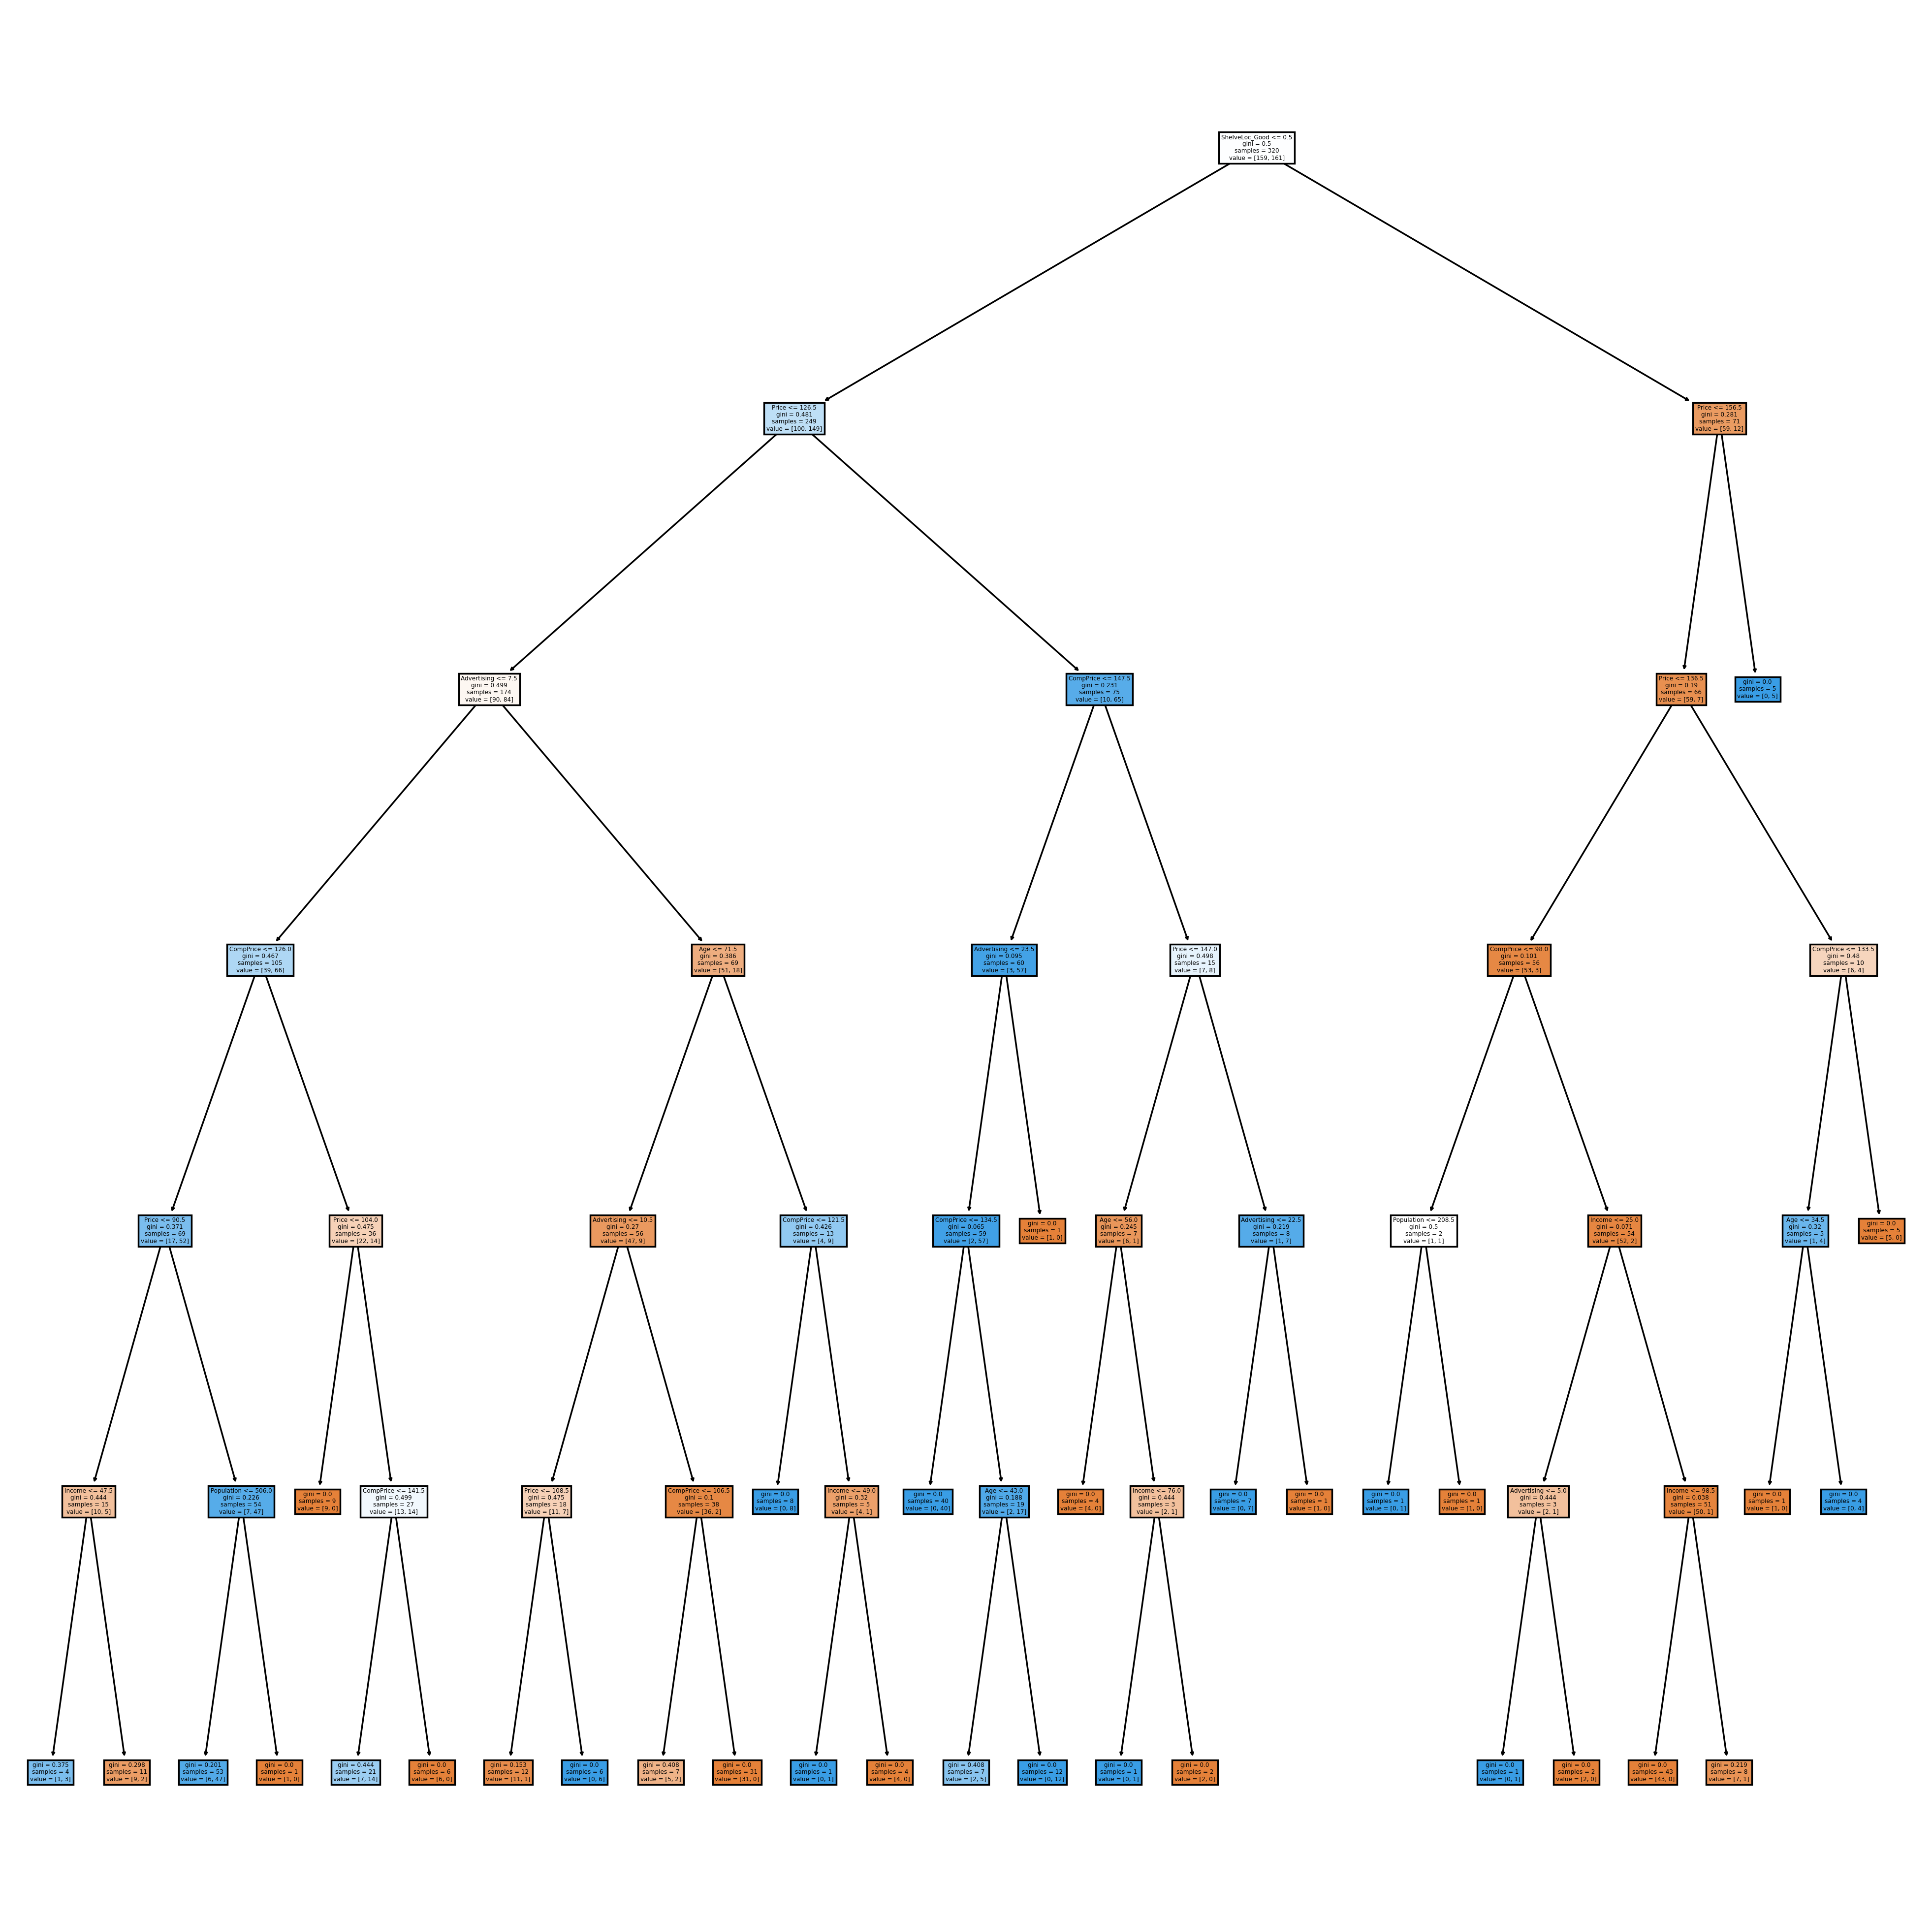

In [22]:
plt.rcParams['figure.figsize']=(20,20)
plt.rcParams['figure.dpi']=250

tree.plot_tree(dt, feature_names=x.columns, filled=True)
plt.show()

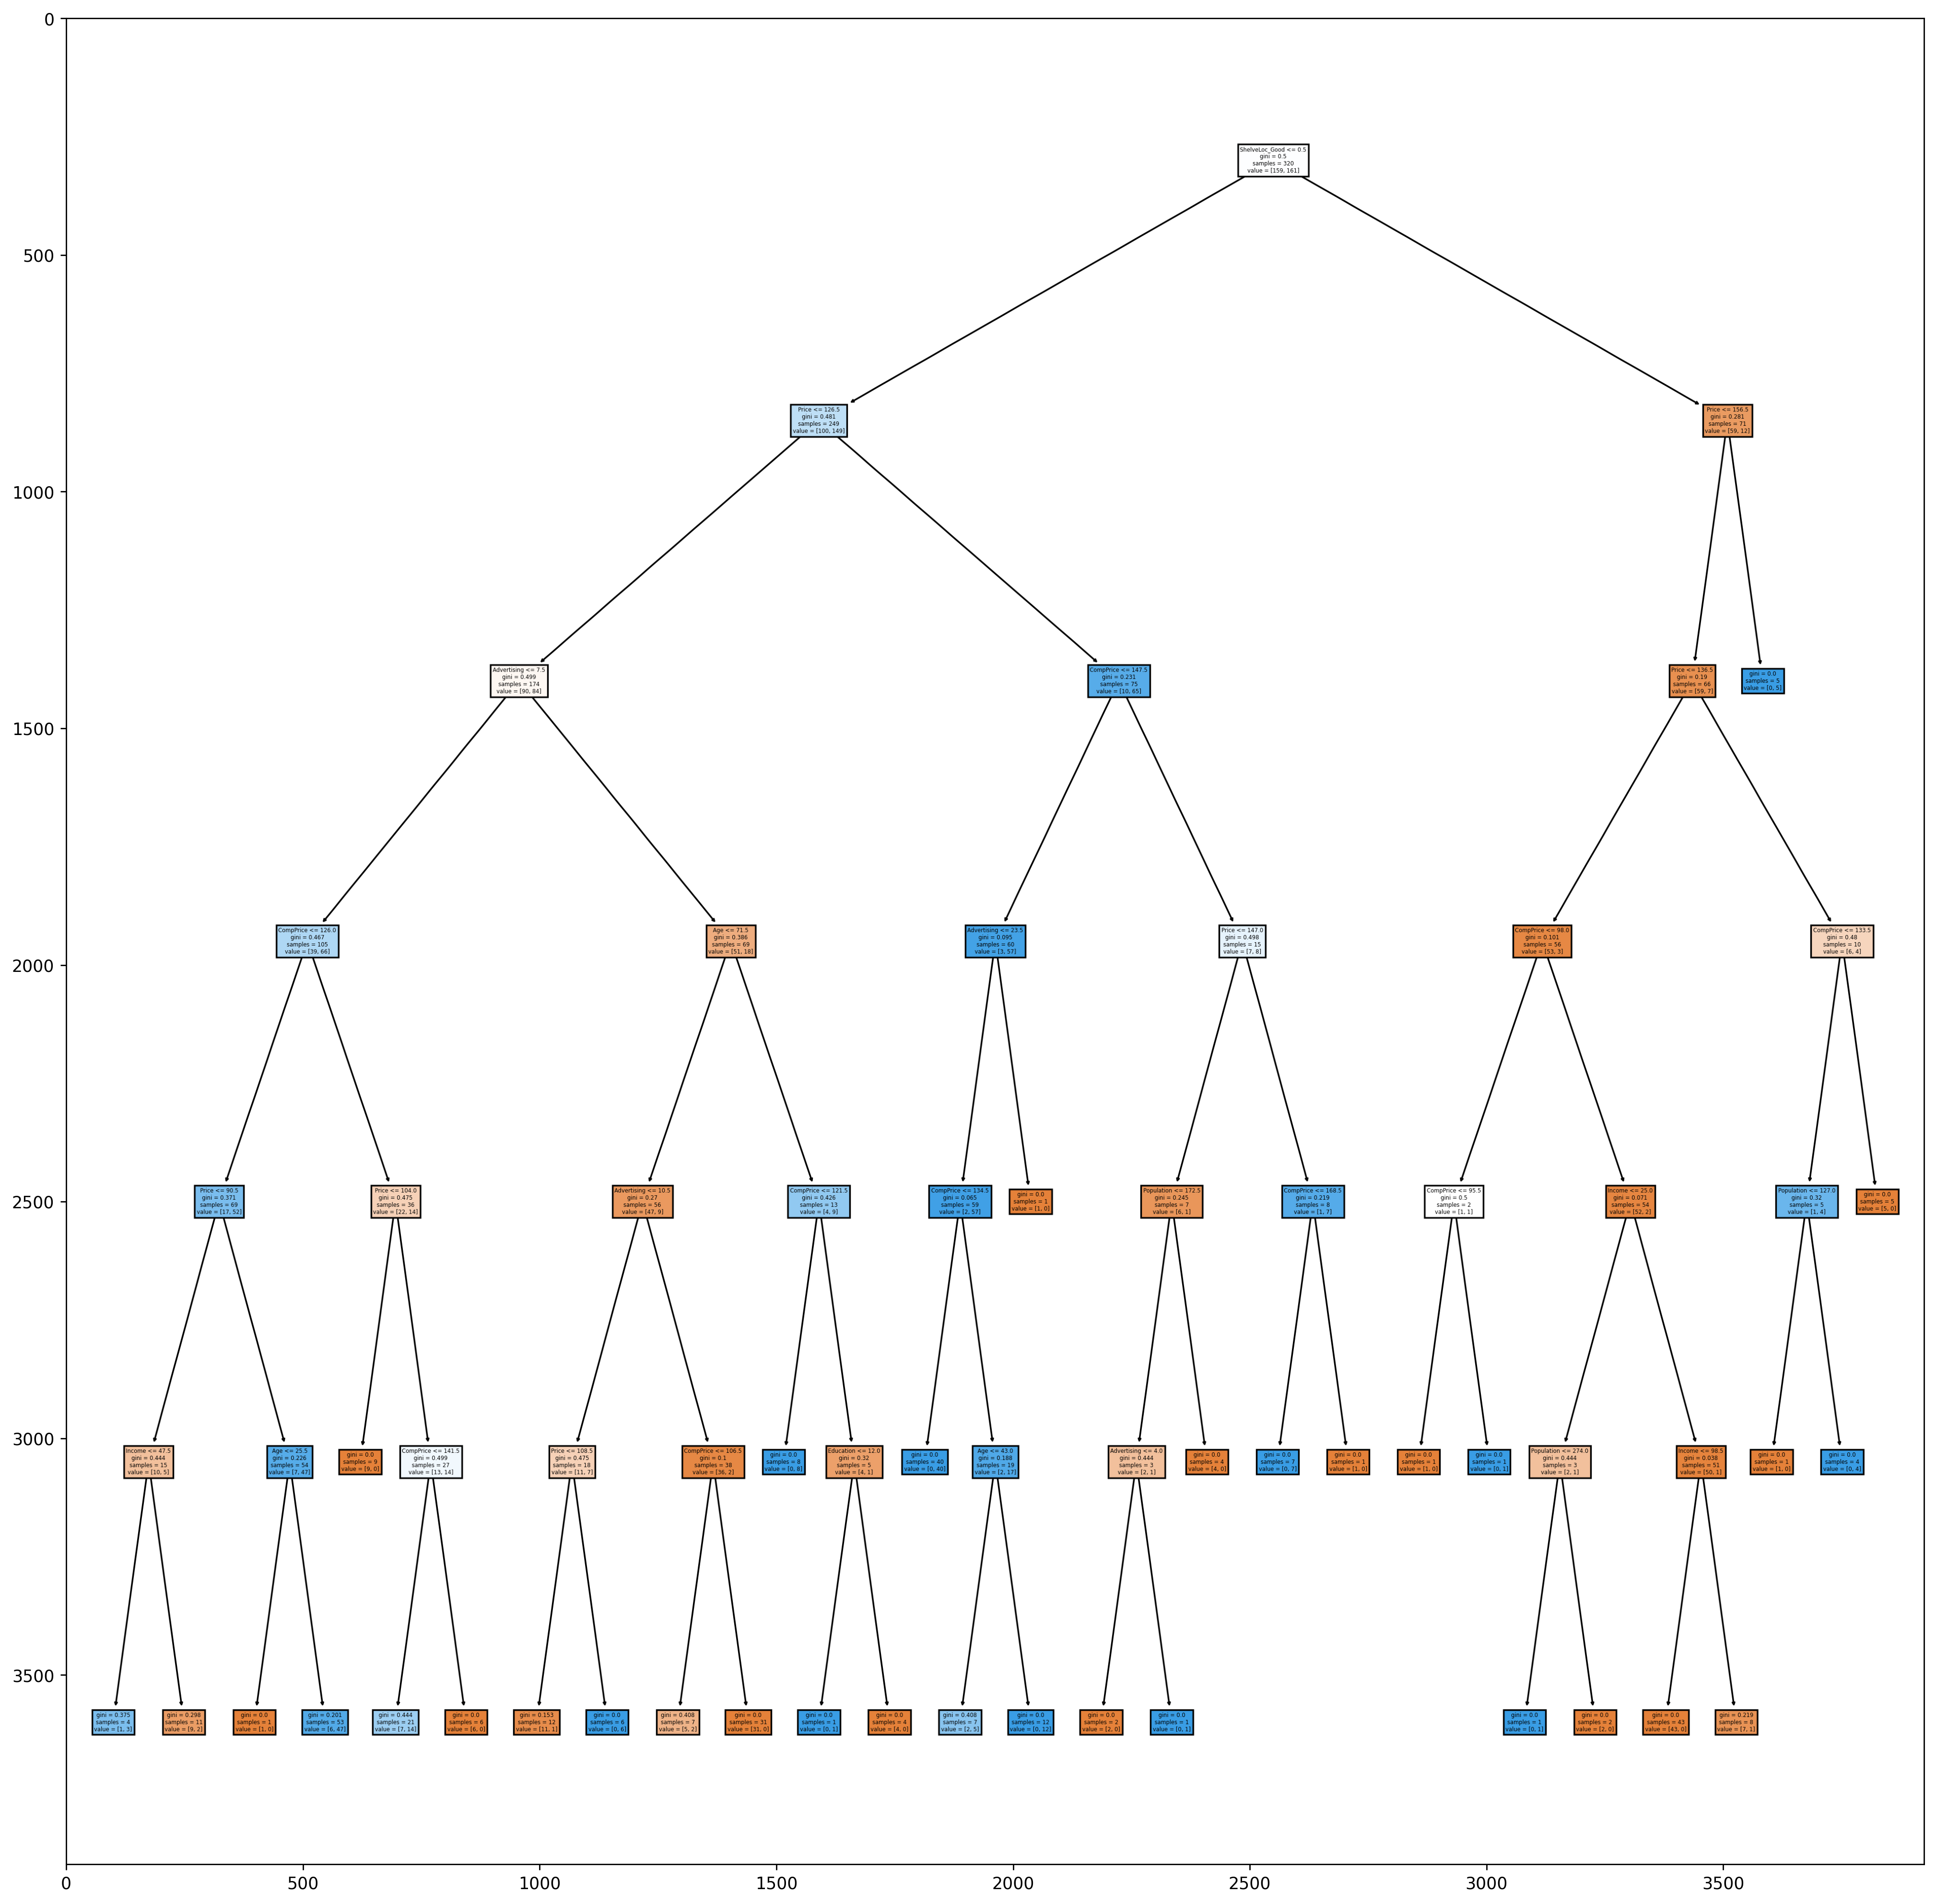

In [23]:
img = mpimg.imread('Company Decision Tree.png')
plt.imshow(img)